In [1]:
import numpy as np
from scipy import constants
import tabulate
import pandas as pd
import matplotlib.pyplot as plt
from tweezer_functions import * 


In [2]:
#Constants in SI units
eps0 = constants.epsilon_0 
m = 39.9626*constants.atomic_mass
c = constants.c
e = constants.e
hbar = constants.hbar
pi = np.pi

In [3]:
df = pd.read_csv('S12D52-Copy2.csv',sep = ",",encoding='UTF-8')
print(df)

   wavelength (nm)  A_ki (s^-1) lower level higher level  Unnamed: 4
0         393.3663  147000000.0       4S1/2        4P3/2         NaN
1         396.8469  140000000.0       4S1/2        4P1/2         NaN


In [4]:
lambdares = df["wavelength (nm)"]
print(lambdares)
lambdares = [i*1e-9 for i in lambdares]
print(lambdares)
omegares = [2*pi*c/i for i in lambdares]
print(omegares)
lifetimes = df["A_ki (s^-1)"]
print(lifetimes)
lifetimes = [i for i in lifetimes]
omegares = np.array(omegares)
linewidths = np.array(lifetimes)
print(linewidths)


0    393.3663
1    396.8469
Name: wavelength (nm), dtype: float64
[3.9336630000000006e-07, 3.9684690000000004e-07]
[4788543317790194.0, 4746544743851730.0]
0    147000000.0
1    140000000.0
Name: A_ki (s^-1), dtype: float64
[1.47e+08 1.40e+08]


In [5]:
NA = 0.6
wx = 2*pi*1e6
d = 5e-6

In [6]:
lambdamag = [1271e-9,1052e-9,395e-9,1054e-9,532e-9,729e-9,300e-9] 
omegamag = [2*pi*c/i for i in lambdamag]
omegamag = np.array(omegamag)
beamwaists = [0.41*i / NA for i in lambdamag]
beamwaists = np.array(beamwaists)

In [7]:
powerlist = list(range(1,50,1))
Popt = [i*1e-3 for i in powerlist]
print(Popt)

[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.01, 0.011, 0.012, 0.013000000000000001, 0.014, 0.015, 0.016, 0.017, 0.018000000000000002, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026000000000000002, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036000000000000004, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043000000000000003, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049]


In [8]:
Uperlambda0 = [ [] for _ in range(len(Popt)) ]
print(Uperlambda0)
sperlambda0 = [ [] for _ in range(len(Popt)) ]
omegaradials0 = []
Utotperpower0 = []
stotperpower0 = []
  
lenPopt = len(Popt)   
print(len(Popt))
    
for j in range(len(Popt)):
    for i in range(len(linewidths)):
        Uperlambda0[j].append(potentialRWA(omegamag[0],linewidths[i],omegares[i],Popt[j],beamwaists[0]))
        #sperlambda0[j].append(scatteringRWA(omegamag[0],linewidths[i],omegares[i],Popt[j],beamwaists[0]))
        print(Uperlambda0)
    Utotperpower0.append((sum(Uperlambda0[j])))
    print(Uperlambda0)
    #stotperpower0.append((sum(sperlambda0[i])))
    omegaradials0.append(omega_radial(abs(Utotperpower0[j]),beamwaists[0],m))
    print(Utotperpower0)
    print(omegaradials0)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
49
[[4.881884027144282e-27], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[4.881884027144282e-27, 4.70922878140947e-27], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[4.881884027144282e-27, 4.70922878140947e-27], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[9.591112808553752e-27]
[875457.2055339416]
[[4.881884027144282e-27, 4.70922878140947e-27], [9.7637680

In [9]:
lenPopt

49

In [10]:
Uperlambda1 = [ [] for _ in range(len(Popt)) ]
sperlambda1 = [ [] for _ in range(len(Popt)) ]
omegaradials1 = []
Utotperpower1 = []
stotperpower1 = []
  
for j in range(len(Popt)):
    for i in range(len(linewidths)):
        Uperlambda1[j].append(potentialRWA(omegamag[1],linewidths[i],omegares[i],Popt[j],beamwaists[1]))
        #sperlambda0[i].append(scattering(omegamag[0],linewidths[i],omegares[i],Popt[j],beamwaists[0]))
        print(Uperlambda1)
    Utotperpower1.append((sum(Uperlambda1[j])))
    #stotperpower0.append((sum(sperlambda0[i])))
    omegaradials1.append(omega_radial(abs(Utotperpower1[j]),beamwaists[1],m))  
    print(omegaradials1)

[[4.4565335430826514e-27], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[4.4565335430826514e-27, 4.3046205027367816e-27], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[1010906.27191282]
[[4.4565335430826514e-27, 4.3046205027367816e-27], [8.913067086165303e-27], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[4.4565335430826514e-27, 4.3046205027367816e-27], [8.913067086165303e-27, 8.609241005473563e-27], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], 

In [11]:
Uperlambda2 = [ [] for _ in range(len(Popt)) ]
sperlambda2 = [ [] for _ in range(len(Popt)) ]
omegaradials2 = []
Utotperpower2 = []
stotperpower2 = []
  
for j in range(len(Popt)):
    for i in range(len(linewidths)):
        Uperlambda2[j].append(potentialRWA(omegamag[2],linewidths[i],omegares[i],Popt[j],beamwaists[2]))
        #sperlambda0[i].append(scattering(omegamag[0],linewidths[i],omegares[i],Popt[j],beamwaists[0]))
        print(Uperlambda2)
    Utotperpower2.append((sum(Uperlambda2[j])))
    #stotperpower0.append((sum(sperlambda0[i])))
    omegaradials2.append(omega_radial(abs(Utotperpower2[j]),beamwaists[2],m))  

[[2.532978657706651e-25], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[2.532978657706651e-25, -2.1527668664852414e-25], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[2.532978657706651e-25, -2.1527668664852414e-25], [5.065957315413302e-25], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[2.532978657706651e-25, -2.1527668664852414e-25], [5.065957315413302e-25, -4.305533732970483e-25], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],

In [12]:
Uperlambda3 = [ [] for _ in range(len(Popt)) ]
sperlambda3 = [ [] for _ in range(len(Popt)) ]
omegaradials3 = []
Utotperpower3 = []
stotperpower3 = []
  
for j in range(len(Popt)):
    for i in range(len(linewidths)):
        Uperlambda3[j].append(potentialRWA(omegamag[3],linewidths[i],omegares[i],Popt[j],beamwaists[3]))
        #sperlambda0[i].append(scattering(omegamag[0],linewidths[i],omegares[i],Popt[j],beamwaists[0]))
        print(Uperlambda3)
    Utotperpower3.append((sum(Uperlambda3[j])))
    #stotperpower0.append((sum(sperlambda0[i])))
    omegaradials3.append(omega_radial(abs(Utotperpower3[j]),beamwaists[3],m))  

[[4.45995160394492e-27], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[4.45995160394492e-27, 4.3078527643645955e-27], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[4.45995160394492e-27, 4.3078527643645955e-27], [8.91990320788984e-27], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[4.45995160394492e-27, 4.3078527643645955e-27], [8.91990320788984e-27, 8.615705528729191e-27], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [

In [13]:
Uperlambda4 = [ [] for _ in range(len(Popt)) ]
sperlambda4 = [ [] for _ in range(len(Popt)) ]
omegaradials4 = []
Utotperpower4 = []
stotperpower4 = []
  
for j in range(len(Popt)):
    for i in range(len(linewidths)):
        Uperlambda4[j].append(potentialRWA(omegamag[4],linewidths[i],omegares[i],Popt[j],beamwaists[4]))
        #sperlambda0[i].append(scattering(omegamag[0],linewidths[i],omegares[i],Popt[j],beamwaists[0]))
        print(Uperlambda4)
    Utotperpower4.append((sum(Uperlambda4[j])))
    #stotperpower0.append((sum(sperlambda0[i])))
    omegaradials4.append(omega_radial(abs(Utotperpower4[j]),beamwaists[4],m))  

[[5.414571570282811e-27], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[5.414571570282811e-27, 5.336339399807061e-27], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[5.414571570282811e-27, 5.336339399807061e-27], [1.0829143140565622e-26], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[5.414571570282811e-27, 5.336339399807061e-27], [1.0829143140565622e-26, 1.0672678799614122e-26], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],

In [14]:
Uperlambda5 = [ [] for _ in range(len(Popt)) ]
sperlambda5 = [ [] for _ in range(len(Popt)) ]
omegaradials5 = []
Utotperpower5 = []
stotperpower5 = []
  
for j in range(len(Popt)):
    for i in range(len(linewidths)):
        Uperlambda5[j].append(potentialRWA(omegamag[5],linewidths[i],omegares[i],Popt[j],beamwaists[5]))
        #sperlambda0[i].append(scattering(omegamag[0],linewidths[i],omegares[i],Popt[j],beamwaists[0]))
        print(Uperlambda5)
    Utotperpower5.append((sum(Uperlambda5[j])))
    #stotperpower0.append((sum(sperlambda0[i])))
    omegaradials5.append(omega_radial(abs(Utotperpower5[j]),beamwaists[5],m))
print(omegaradials5)
print(Popt)

[[4.199515073044421e-27], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[4.199515073044421e-27, 4.077208651866009e-27], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[4.199515073044421e-27, 4.077208651866009e-27], [8.399030146088842e-27], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[[4.199515073044421e-27, 4.077208651866009e-27], [8.399030146088842e-27, 8.154417303732018e-27], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []

In [15]:
omegaradials0n = [i*1e-6/(2*pi) for i in omegaradials0]
omegaradials1n = [i*1e-6/(2*pi) for i in omegaradials1]
omegaradials2n = [i*1e-6/(2*pi) for i in omegaradials2]
omegaradials3n = [i*1e-6/(2*pi) for i in omegaradials3]
omegaradials4n = [i*1e-6/(2*pi) for i in omegaradials4]
omegaradials5n = [i*1e-6/(2*pi) for i in omegaradials5]

In [16]:
print(omegaradialsn[1])

NameError: name 'omegaradialsn' is not defined

In [ ]:
fig, ax1 = plt.subplots(dpi=600)


ax1.plot(powerlist,omegaradials0n,label = "1271 nm",color = 'b')
ax1.plot(powerlist,omegaradials1n,label = "1052 nm",color = 'g')
ax1.plot(powerlist,omegaradials2n,label = "395 nm",color = 'r')
ax1.plot(powerlist,omegaradials3n,label = "1064 nm",color = 'y')
ax1.plot(powerlist,omegaradials4n,label = "532 nm",color = 'm')
ax1.plot(powerlist,omegaradials5n,label = "400 nm",color = 'c')


ax1.set_xlabel('Optical Power (mW)',fontsize= 15)

ax1.set_ylabel('Optical Trap Frequency (MHz)',fontsize= 15)

ax1.legend(loc = "upper left")
ax1.tick_params(axis='y')

ax1.grid(True, which="both")
plt.title("Optical Trap Frequencies \n for Various Optical Tweezer Wavelengths",fontsize= 20)
fig.tight_layout()
#plt.savefig("stoponly.png")
plt.show()

#print(beamwaists)

for 10 mW, trap frequency vs tweezer wavelength 
I'll go from 300 nm to 1700 nm? idk if the 1700 is viable but it'd be nice to see it 


I think the way I've defined the function isn't helpful to me here. 
Detuning shouldn't be it's own function, it should just be omegatweeze-omegares and I should loop overthe appropriate indices in my for loop *sigh* 


In [17]:
Popt = 1.5e-3
wavelengthsweep = list(range(300,800,1))
tweezerfrequencies = np.array([2*pi*c/(i*1e-9) for i in wavelengthsweep])
tweezerwavelengths = np.array(wavelengthsweep)

In [18]:
potentials = [ [] for _ in range(len(tweezerfrequencies)) ]

beamwaistsnew = [(0.41 * i *1e-9)/(1 * NA) for i in tweezerwavelengths]
#print(len(beamwaistsnew))
#Detuning = omegares - tweezerfrequencies
pottot = []
omegaradialsnewp = []
keeptrack = [ [] for _ in range(len(tweezerfrequencies)) ]


for i in range(len(tweezerwavelengths)):
    for j in range(len(omegares)):
        potentials[i].append(potentialRWA(tweezerfrequencies[i],linewidths[j],omegares[j],Popt,beamwaistsnew[i]))
        #print(j)
    pottot.append(sum(potentials[i]))
    #print(i)
    #print(pottot)
    omegaradialsnewp.append(omega_radial(abs(pottot[i]),beamwaistsnew[i],m))
    #print(wxtsnewp)
    


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


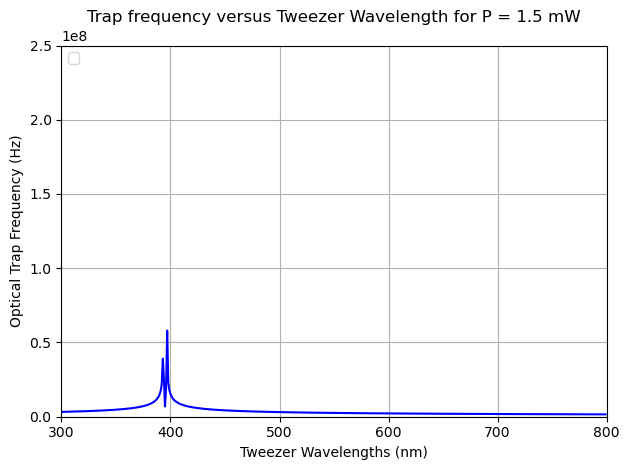

In [19]:
fig, ax1 = plt.subplots()

ax1.plot(tweezerwavelengths,omegaradialsnewp,color = 'b')



ax1.set_xlabel('Tweezer Wavelengths (nm)')

ax1.set_ylabel('Optical Trap Frequency (Hz)')

ax1.legend(loc = "upper left")
ax1.tick_params(axis='y')

ax1.grid(True, which="both")
ax1.set_xlim(300,800)
ax1.set_ylim(0,0.25e9)
plt.title("Trap frequency versus Tweezer Wavelength for P = 1.5 mW")
fig.tight_layout()
plt.savefig("stoponly--power.png")
plt.show()

In [20]:
sca = [ [] for _ in range(len(tweezerfrequencies)) ]
beamwaistsnew = [(0.41 * i *1e-9)/(1 * NA) for i in tweezerwavelengths]
print(len(beamwaistsnew))
#Detuning = omegares - tweezerfrequencies
scatot = []
wxtsnew = []
keeptrack = [ [] for _ in range(len(tweezerfrequencies)) ]


for i in range(len(beamwaistsnew)):
    for j in range(len(omegares)):
        sca[i].append(scatteringRWA(tweezerfrequencies[i],linewidths[j],omegares[j],Popt,beamwaistsnew[i]))
        #print(potentials)
    scatot.append(sum(sca[i]))
    #print(pottot)
    #wxtsnew.append(wxt(abs(pottot[i]),beamwaistsnew[i]))

500


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


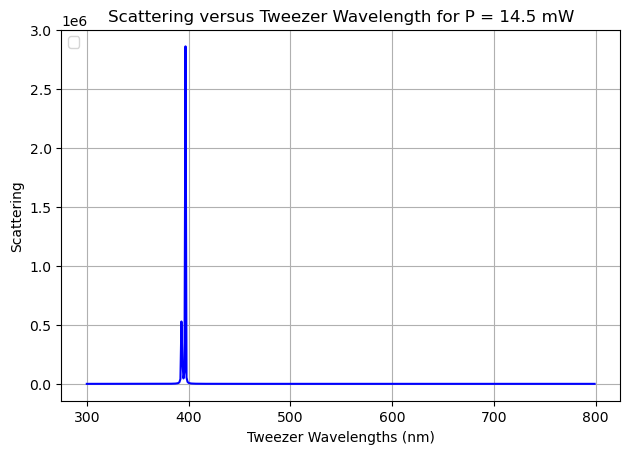

In [21]:
fig, ax2 = plt.subplots()

ax2.plot(tweezerwavelengths,scatot,color = 'b')



ax2.set_xlabel('Tweezer Wavelengths (nm)')

ax2.set_ylabel('Scattering')

ax2.legend(loc = "upper left")
ax2.tick_params(axis='y')

ax2.grid(True, which="both")
plt.title("Scattering versus Tweezer Wavelength for P = 14.5 mW")
fig.tight_layout()
plt.savefig("stoponly-scattering.png")
plt.show()

In [23]:
omegaradialsnewpnew = [i*1e-6/(2*pi) for i in omegaradialsnewp]

print(omegaradialsnewpnew[0])

0.5180609695801388


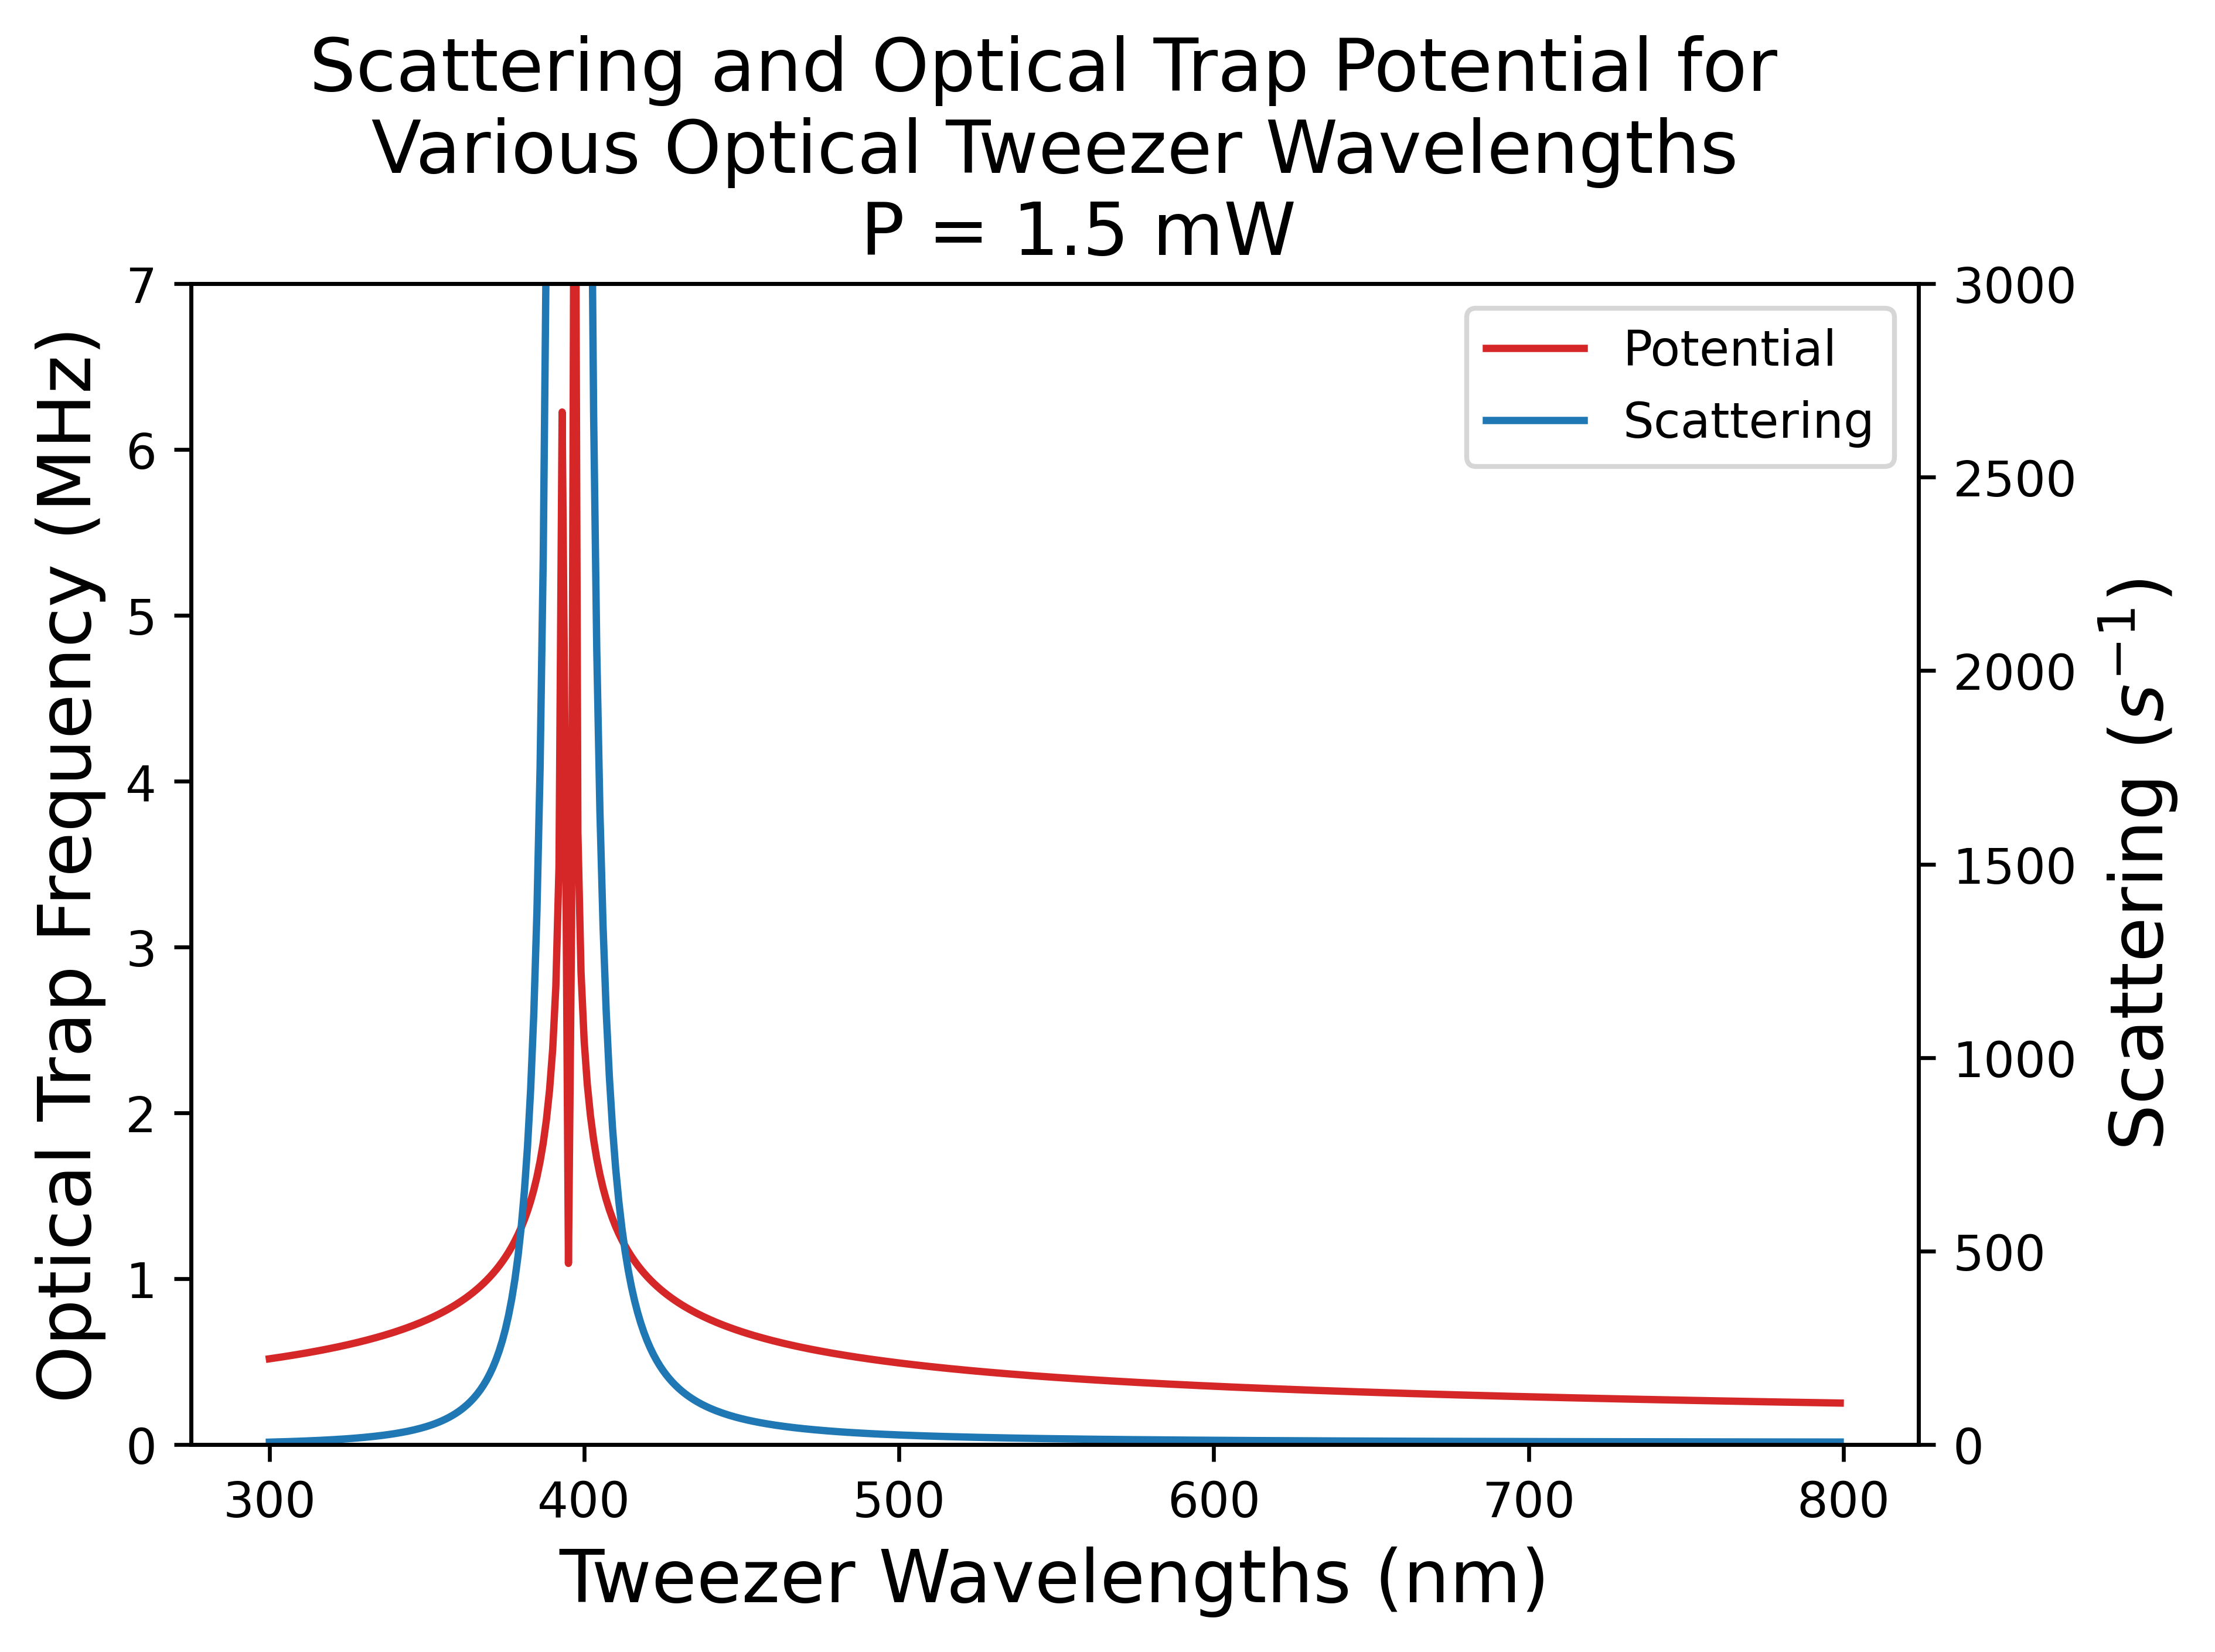

In [25]:
fig, ax1 = plt.subplots(dpi = 600)

color = 'tab:red'
ax1.plot(tweezerwavelengths,omegaradialsnewpnew,color = color,label = "Potential")
ax1.set_xlabel('Tweezer Wavelengths (nm)',fontsize = 15)
ax1.set_ylabel('Optical Trap Frequency (MHz)',fontsize = 15)
ax1.tick_params(axis='y')
plt.ylim(0,7)

#ax1.grid(True, which="both")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(tweezerwavelengths,scatot,color = color,label = "Scattering")
ax2.set_xlabel('Optical Tweezer Wavelengths (nm)')
ax2.set_ylabel('Scattering ($s^{-1}$)',fontsize = 15)
ax2.tick_params(axis='y')
plt.ylim(0,0.0003*1e7)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.title("Scattering and Optical Trap Potential for \n Various Optical Tweezer Wavelengths \n  P = 1.5 mW",fontsize = 15)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()